In [28]:
## dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy.stats as st
from scipy.stats import linregress
import random

In [29]:
## import base data file and read in dataframe

data_file = "Resources/clean_with_lat_long.csv"
data_df = pd.read_csv(data_file)
data_df

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,...,# Deaths,Years of Potential Life Lost Rate,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Latitude,Longitude
0,Alabama,Autauga,54571,20221,13.858333,61082.916667,18092.661348,30141.638549,11064.872922,6835.642497,...,830.0,9158.0,34,18,711.0,145.0,1327.0,19.0,32.534920,-86.642749
1,Alabama,Baldwin,182265,73180,14.358065,60664.935484,46400.350641,72307.849152,43486.806226,15459.848416,...,2573.0,7394.0,27,16,2615.0,415.0,4791.0,20.0,30.660970,-87.749840
2,Alabama,Barbour,27457,9820,24.533333,43123.000000,6683.975691,9302.717960,1182.176872,3251.362574,...,413.0,8573.0,44,25,525.0,85.0,771.0,45.0,31.869603,-85.393197
3,Alabama,Bibb,22915,7953,16.025000,43362.500000,295.614426,295.614426,0.000000,164.903295,...,407.0,11766.0,40,20,333.0,33.0,561.0,29.0,32.998644,-87.126439
4,Alabama,Blount,57322,21578,17.911111,52136.000000,5855.939161,7387.084978,3900.420369,2570.900481,...,906.0,9333.0,35,19,705.0,123.0,1316.0,22.0,33.980867,-86.567371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,Wyoming,Sweetwater,43806,16475,11.841667,81835.083333,9400.240856,16730.468695,8914.971285,1816.028671,...,445.0,6878.0,32,16,469.0,159.0,1053.0,10.0,41.659496,-108.879431
3091,Wyoming,Teton,21294,8973,8.100000,89555.250000,3711.377493,3949.327991,2605.093461,972.594547,...,116.0,3728.0,13,12,104.0,NaN,558.0,8.0,43.934637,-110.589810
3092,Wyoming,Uinta,21118,7668,14.166667,65312.666667,758.694309,758.694309,13.350968,318.523395,...,234.0,7660.0,28,15,243.0,8.0,475.0,12.0,41.287492,-110.547562
3093,Wyoming,Washakie,8533,3492,14.133333,62213.666667,1057.246483,2537.470166,885.406917,359.634002,...,97.0,7294.0,28,14,156.0,7.0,174.0,16.0,43.904997,-107.682861


In [30]:
## display full list of column headers in our data_df for reference
list(data_df.columns.values)

['State',
 'County',
 'POP2010',
 'OHU2010',
 'PovertyRate',
 'MedianFamilyIncome',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_10',
 'LALOWI1_20',
 'lapophalf',
 'TractKids',
 'TractSeniors',
 'TractWhite',
 'TractBlack',
 'TractAsian',
 'TractNHOPI',
 'TractAIAN',
 'TractOMultir',
 'TractHispanic',
 'TractHUNV',
 'TractSNAP',
 'Food Environment Index',
 '# Deaths',
 'Years of Potential Life Lost Rate',
 '% Obese',
 '% Fair/Poor',
 '# Diabetics',
 '# Violent Crimes',
 '# Unemployed',
 '% Children in Poverty',
 'Latitude',
 'Longitude']

In [31]:
## investigating data
## find low and high MDI (median family income) 
minMDI = data_df['MedianFamilyIncome'].min()
maxMDI = data_df['MedianFamilyIncome'].max()
print(minMDI)
print(maxMDI)

21623.0
133021.22033898305


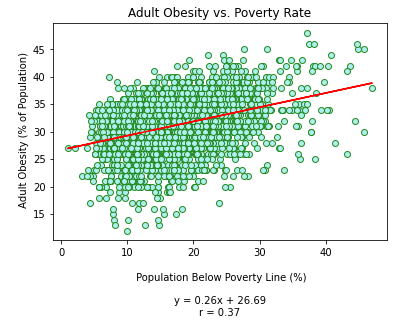

In [42]:
## plot poverty rate% vs %obesity

## get df with only values that correspond for both series 
plot1_df = data_df[(pd.notnull(data_df['PovertyRate'])) & (pd.notnull(data_df['% Obese']))]

## Set axes
x_axis = plot1_df['PovertyRate']
y_axis = plot1_df['% Obese']

## parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

## Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

## scatter plot
plot1 = plt.scatter(x_axis, y_axis, marker="o", facecolors="paleturquoise", edgecolors="forestgreen")
plt.title(f"Adult Obesity vs. Poverty Rate")
plt.xlabel("\n Population Below Poverty Line (% of County Population)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Adult Obesity (% of County Population)")

fig1 = plt.gcf()
plt.show()
fig1.savefig("Scatter_Plots/Fig 01 - Obesity_Poverty", dpi=100)


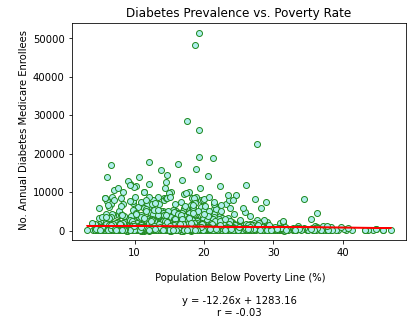

In [46]:
## plot poverty rate% vs %obesity
## get df with only values that correspond for both series 
plot2_df = data_df[(pd.notnull(data_df['PovertyRate'])) & (pd.notnull(data_df['# Diabetics']))]

## Set axes
x_axis = plot2_df['PovertyRate']
y_axis = plot2_df['# Diabetics']

## parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

## Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

## scatter plot
plot2 = plt.scatter(x_axis, y_axis, marker="o", facecolors="paleturquoise", edgecolors="forestgreen")
plt.title(f"Diabetes Prevalence vs. Poverty Rate")
plt.xlabel("\n Population Below Poverty Line (% of County Population)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n No. Annual Diabetes Medicare Enrollees in County")

fig2 = plt.gcf()
plt.show()
fig2.savefig("Scatter_Plots/Fig 02 - Diabetes_Poverty", dpi=100)


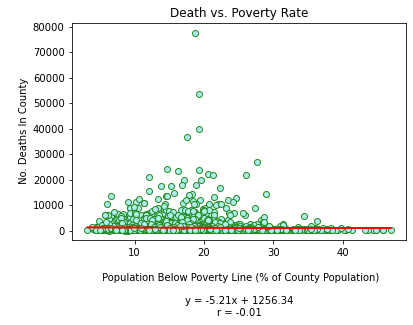

In [47]:
## plot poverty rate% vs #deaths

## get df with only values that correspond for both series 
plot3_df = data_df[(pd.notnull(data_df['PovertyRate'])) & (pd.notnull(data_df['# Deaths']))]

## Set axes
x_axis = plot3_df['PovertyRate']
y_axis = plot3_df['# Deaths']

## parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

## Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

## scatter plot
plot3 = plt.scatter(x_axis, y_axis, marker="o", facecolors="paleturquoise", edgecolors="forestgreen")
plt.title(f"Death vs. Poverty Rate")
plt.xlabel("\n Population Below Poverty Line (% of County Population)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n No. Deaths In County")

fig3 = plt.gcf()
plt.show()
fig3.savefig("Scatter_Plots/Fig 02 - Death_Poverty", dpi=100)


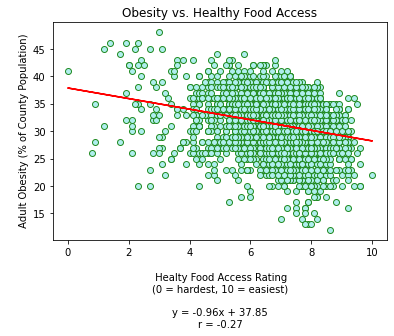

In [48]:
## plot food environment index vs %obesity

## get df with only values that correspond for both series 
plot4_df = data_df[(pd.notnull(data_df['Food Environment Index'])) & (pd.notnull(data_df['% Obese']))]

## Set axes
x_axis = plot4_df['Food Environment Index']
y_axis = plot4_df['% Obese']

## parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

## Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

## scatter plot
plot4 = plt.scatter(x_axis, y_axis, marker="o", facecolors="paleturquoise", edgecolors="forestgreen")
plt.title(f"Obesity vs. Healthy Food Access")
plt.xlabel("\n Healty Food Access Rating" + "\n" "(0 = hardest, 10 = easiest)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Adult Obesity (% of County Population)")

fig4 = plt.gcf()
plt.show()
fig4.savefig("Scatter_Plots/Fig 04 - Obesity_FoodIndex", dpi=100)

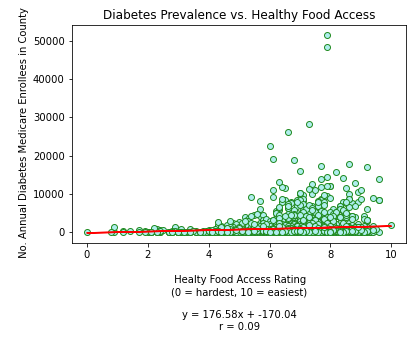

In [49]:
## plot food environment index vs #diabetes enrollment

## get df with only values that correspond for both series 
plot5_df = data_df[(pd.notnull(data_df['Food Environment Index'])) & (pd.notnull(data_df['# Diabetics']))]

## Set axes
x_axis = plot5_df['Food Environment Index']
y_axis = plot5_df['# Diabetics']

## parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

## Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

## scatter plot
plot5 = plt.scatter(x_axis, y_axis, marker="o", facecolors="paleturquoise", edgecolors="forestgreen")

plt.title(f"Diabetes Prevalence vs. Healthy Food Access")
plt.xlabel("\n Healty Food Access Rating" + "\n" "(0 = hardest, 10 = easiest)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n No. Annual Diabetes Medicare Enrollees in County")

fig5 = plt.gcf()
plt.show()
fig5.savefig("Scatter_Plots/Fig 05 - Diabetes_FoodIndex", dpi=100)

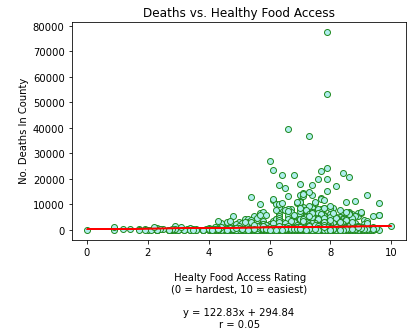

In [52]:
## plot food environment index vs #deaths
## get df with only values that correspond for both series 
plot6_df = data_df[(pd.notnull(data_df['Food Environment Index'])) & (pd.notnull(data_df['# Deaths']))]

## Set axes
x_axis = plot6_df['Food Environment Index']
y_axis = plot6_df['# Deaths']

## parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

## Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

## scatter plot
plot6 = plt.scatter(x_axis, y_axis, marker="o", facecolors="paleturquoise", edgecolors="forestgreen")

plt.title(f"Deaths vs. Healthy Food Access")
plt.xlabel("\n Healty Food Access Rating" + "\n" "(0 = hardest, 10 = easiest)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n No. Deaths In County")

fig6 = plt.gcf()
plt.show()
fig6.savefig("Scatter_Plots/Fig 06 - Deaths_FoodIndex", dpi=100)

In [ ]:
## plot TractSNAP vs. %obesity, #diabestes enrollment, and #deaths

In [ ]:
## plot poverty rate% vs food environment index

In [ ]:
## plot #unemployed vs. #violent crimes

In [ ]:
##decided to ditch this approach - too complicated

## Group data by income levels to start. 
## 26,200, assuming a 4-person household under the national poverty limit
## 30,160, assuming a 4-person household, each earner making national minimum wage; 
## 30,160, assuming a 4-person household, each earner making national minimum wage; 
## and incrementally higher salaries per 4-person (2-earner) household: 45,000, 70,000, 100,000, 150,000 

# df_income = data_df.loc[((data_df["Temp (F)"] > 70) & (weather_df["Temp (F)"] < 80))
#                           & (weather_df["Wind Speed (mph)"] < 10)
#                           & (weather_df["Cloudiness (%)"] == 0), :]

# df_income_pov = data_df.loc[data_df['MedianFamilyIncome'] <= 26200, :]
# df_income_mw = data_df.loc[(data_df['MedianFamilyIncome'] > 26200) & 
#                            (data_df['MedianFamilyIncome'] <= 30160), :]
# df_income45 = data_df.loc[(data_df['MedianFamilyIncome'] > 30160) & 
#                            (data_df['MedianFamilyIncome'] <= 45000), :]
# df_income70 = data_df.loc[(data_df['MedianFamilyIncome'] > 45000) & 
#                            (data_df['MedianFamilyIncome'] <= 70000), :]
# df_income100 = data_df.loc[(data_df['MedianFamilyIncome'] > 70000) & 
#                            (data_df['MedianFamilyIncome'] <= 100000), :] 
# df_income150 = data_df.loc[(data_df['MedianFamilyIncome'] > 100000) & 
#                            (data_df['MedianFamilyIncome'] <= 150000), :] 
